In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#%matplotlib widget

In [8]:
N = 10000 # Number of time steps

A = np.zeros(N) # True state
A_hat = np.zeros(N) # Estimate
K = np.zeros(N) # Value of Kalman gain
y = np.zeros(N) # Measurements
p = np.zeros(N) # Estimate variance
xi_all = np.zeros(N) # Measurement variance

In [9]:
k = 0.001 # Growth rate

A0 = 1   # Initial size
C0 = 1e3 # Number of molecules counted at first measurement 

# Initial size
A[0] = A0 

# Variance of estimate and measurement
p[0] = (A0**2)/C0 
xi_all[0] = p[0]

# Make a measurement
y[0] = A[0] + np.random.normal(loc=0.0, scale=np.sqrt(p[0]))

# Take this measurement as the estimate because we have no other information
K[0] = 1 
A_hat[0] = y[0]

In [30]:
for n in range(0, N-1):
    
    # Update growth noise
    d_width = np.sqrt(A[n])
    #d = 0
    d = np.random.normal(loc=0.0, scale=np.sqrt(d_width))
    
    # Update measurement noise
    xi_width = A0**2*np.exp(3*k*(n+1))/C0
    xi = np.random.normal(loc=0.0, scale=np.sqrt(xi_width))
    xi_all[n+1] = xi_width
    
    # Update the true state
    A[n+1] = (k+1)*A[n] + d
    
    if A[n+1] <= 0: # True size never goes below 0
        A[n+1] = A[n]
    
    # Predict the true state using the internal model and the previous estimate
    A_hat_ = (k+1)*A_hat[n]
    
    # Predict the variance of the estimate
    p_ = (1+k)**2*p[n] + d_width
    
    # Make a measurement
    y[n+1] = A[n+1] + xi
    
    # Calculate optimal Kalman gain 
    K[n+1] = p_ / (p_ + xi_width)
    #K[n+1] = 1
    
    # Best estimate
    A_hat[n+1] = (1 - K[n+1])*A_hat_ + K[n+1]*y[n+1]
    
    # Update the error variance
    p[n+1] = (1 - K[n+1])*p_

Text(0.5, 1.0, 'Kalman gain')

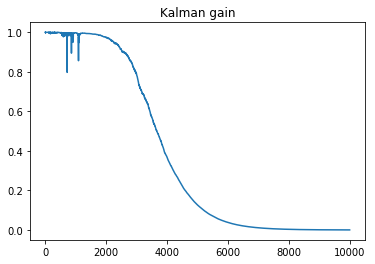

In [31]:
fig = plt.figure()
plt.plot(K)
plt.title('Kalman gain')

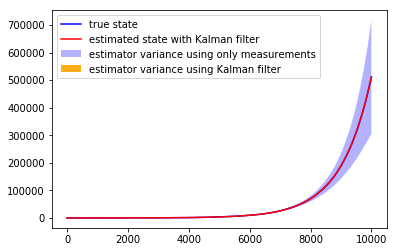

In [32]:
fig, ax = plt.subplots()
ax.plot(A, label='true state', color='blue')
ax.plot(A_hat, label='estimated state with Kalman filter', color='red')
ax.fill_between(x=range(0, N), y1=A-2*np.sqrt(xi_all), y2=A+2*np.sqrt(xi_all), facecolor='blue', alpha=0.3, label='estimator variance using only measurements')
ax.fill_between(x=range(0, N), y1=A-2*np.sqrt(p), y2=A+2*np.sqrt(p), facecolor='orange', alpha=0.9, label='estimator variance using Kalman filter')
ax.legend(loc='upper left')

Text(0.5, 1.0, 'measurements')

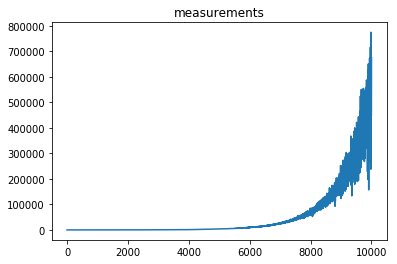

In [33]:
plt.plot(y)
plt.title('measurements')

Text(0.5, 1.0, 'estimation error')

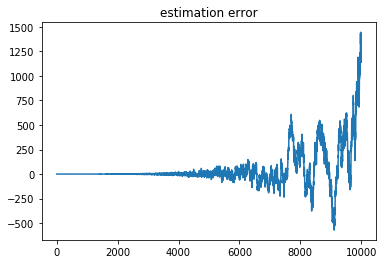

In [34]:
plt.plot(A_hat-A)
plt.title('estimation error')

Text(0.5, 1.0, 'estimate confidence interval')

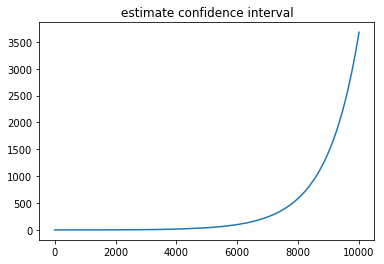

In [41]:
plt.plot(2*np.sqrt(p))
plt.title('estimate confidence interval')

Text(0.5, 1.0, 'measurement confidence interval')

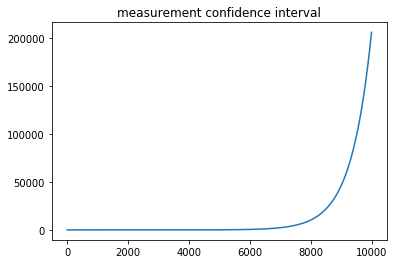

In [42]:
plt.plot(2*np.sqrt(xi_all))
plt.title('measurement confidence interval')

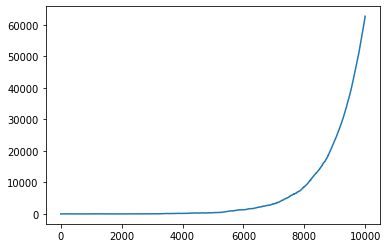

In [11]:
plt.plot(A)